### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
*  Z-score method
* Interquartile Range Method( IQR ) method
* Compare Skewness

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

#### missing value imputation
#### outlier detection and handling

In [2]:
df = pd.read_csv('data/output/google_missing_imputed.csv')

In [3]:
# Checking null values in features
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year              0
month             0
day               0
dtype: int64

**Show Top 5 Records**

In [4]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
1148,"Money Lover: Expense Tracker, Budget Planner",FINANCE,4.4,126447,17.0,1000000,Free,0.0,Everyone,Finance,2018-08-01,Varies with device,Varies with device,2018,8,1
6028,BD Internet Packages (Updated),COMMUNICATION,4.0,474,3.0,50000,Free,0.0,Everyone,Communication,2016-08-05,0.0.5,4.0 and up,2016,8,5
10204,Who Viewed My FB Profile,FAMILY,3.4,121,6.3,10000,Free,0.0,Everyone,Entertainment,2017-12-26,2.0,4.0.3 and up,2017,12,26
3797,SmartNews: Breaking News Headlines,NEWS_AND_MAGAZINES,4.2,233305,3.1,10000000,Free,0.0,Everyone,News & Magazines,2018-08-03,5.1.10,2.2 and up,2018,8,3
5576,SleepCloud Backup for Sleep as Android,LIFESTYLE,4.2,2563,24.0,100000,Free,0.0,Everyone,Lifestyle,2018-06-26,Varies with device,Varies with device,2018,6,26


In [5]:
df.shape

(10840, 16)

In [7]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,year,month,day
0,4.1,159,19.0,10000,0.0,2018,1,7
1,3.9,967,14.0,500000,0.0,2018,1,15
2,4.7,87510,8.7,5000000,0.0,2018,8,1
3,4.5,215644,25.0,50000000,0.0,2018,6,8
4,4.3,967,2.8,100000,0.0,2018,6,20


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
 13  year            10840 non-null  int64  
 14  month           10840 non-null  int64  
 15  day             10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

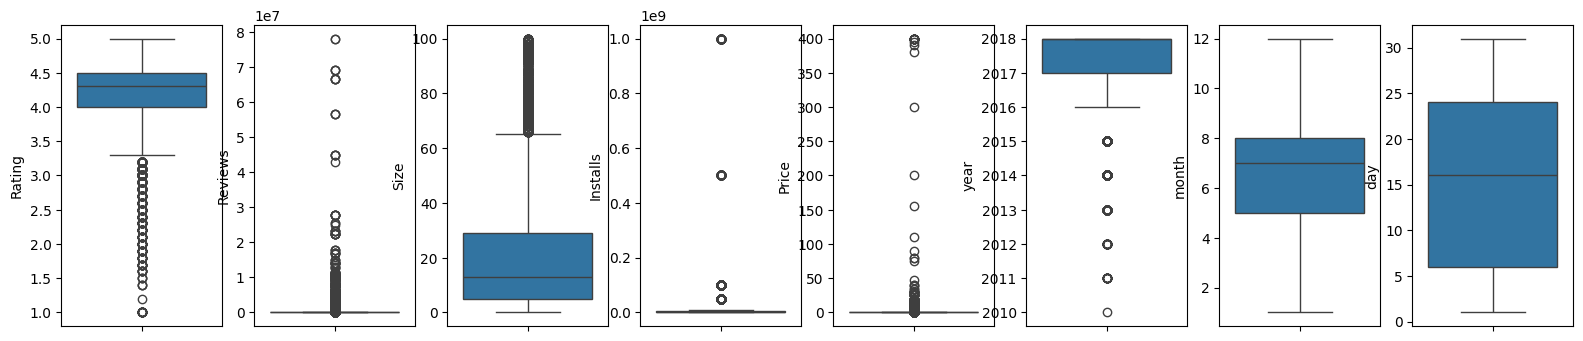

In [11]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- Except Day and month feature we have outliers in all other features

In [12]:
num_df['Rating'].quantile(0.10)

3.6

In [15]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
outlier_thresholds(num_df,'Rating')

(1.95, 6.3500000000000005)

In [17]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [18]:
replace_with_thresholds(num_df,num_df.columns)

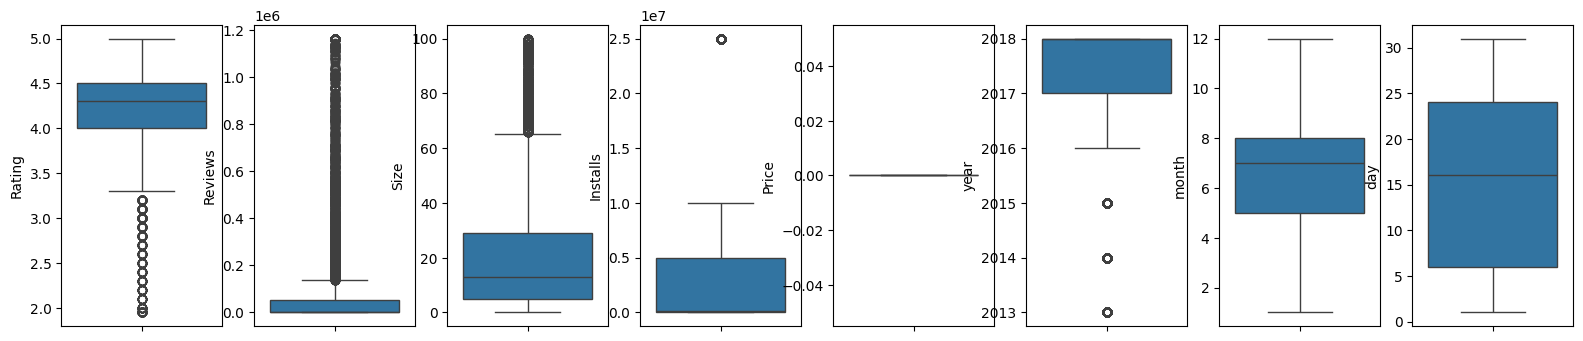

In [20]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can see from above boxplots outliers are not removed properly

### 3.  Interquartile Range Method( IQR ) method

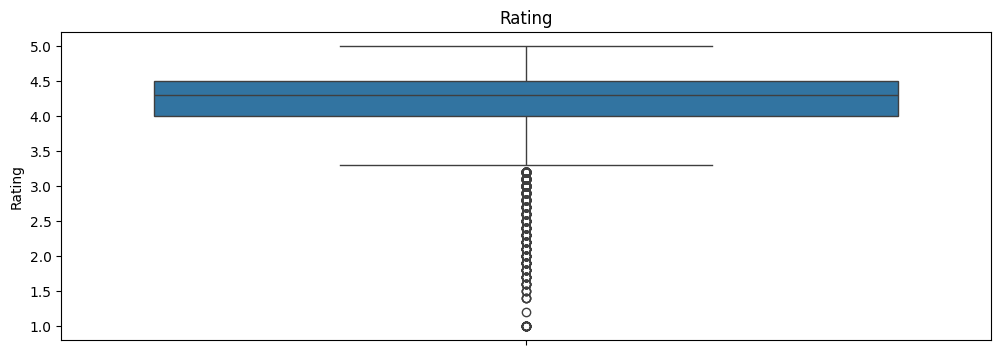

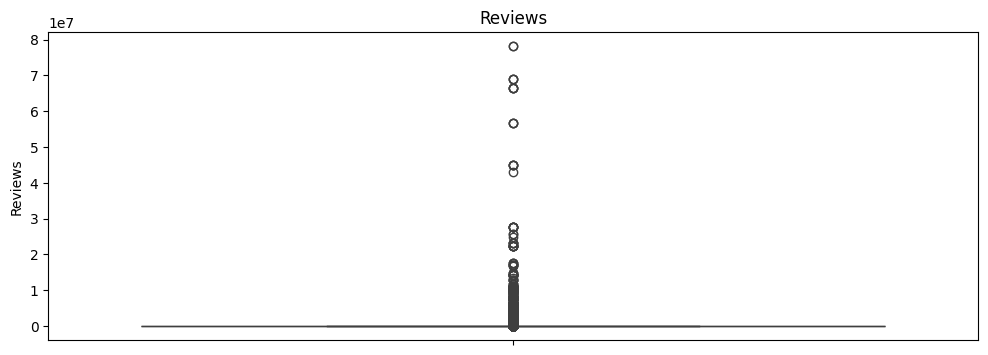

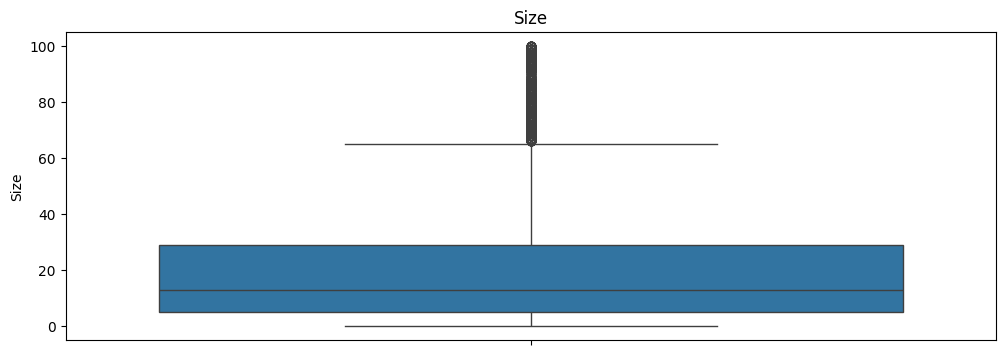

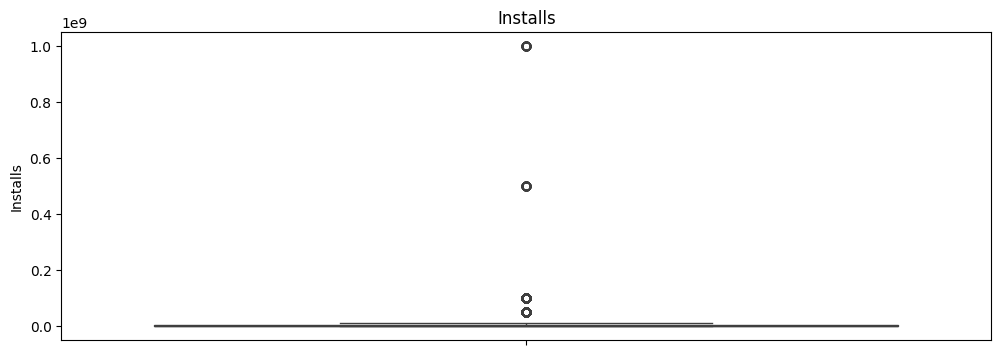

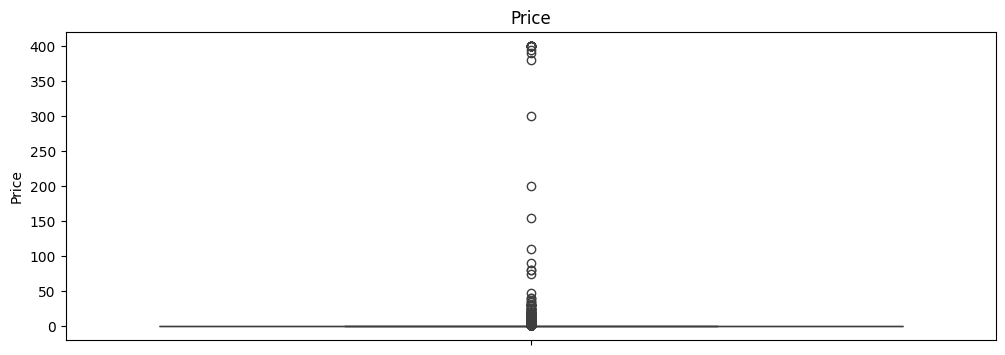

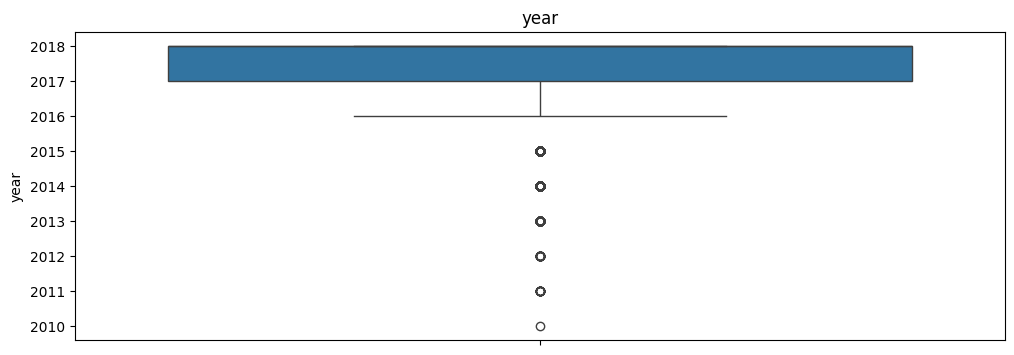

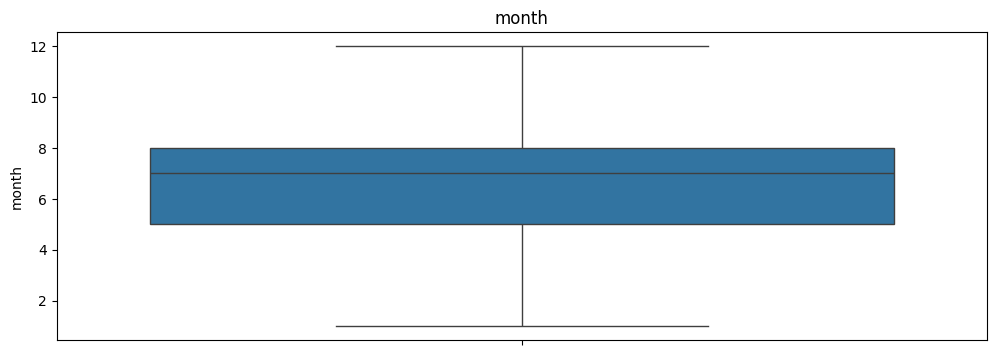

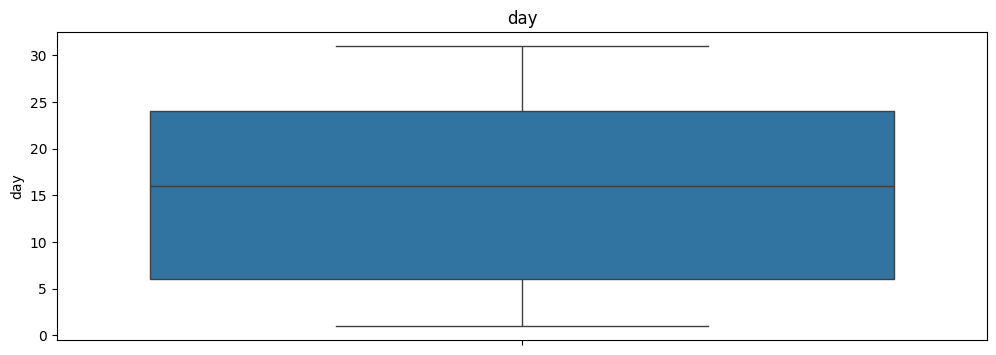

In [23]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [24]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [25]:
remove_outliers_IQR('Size')

percentile25 4.9
percentile75 29.0
Upper limit 65.15
Lower limit -31.250000000000007


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day


In [30]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

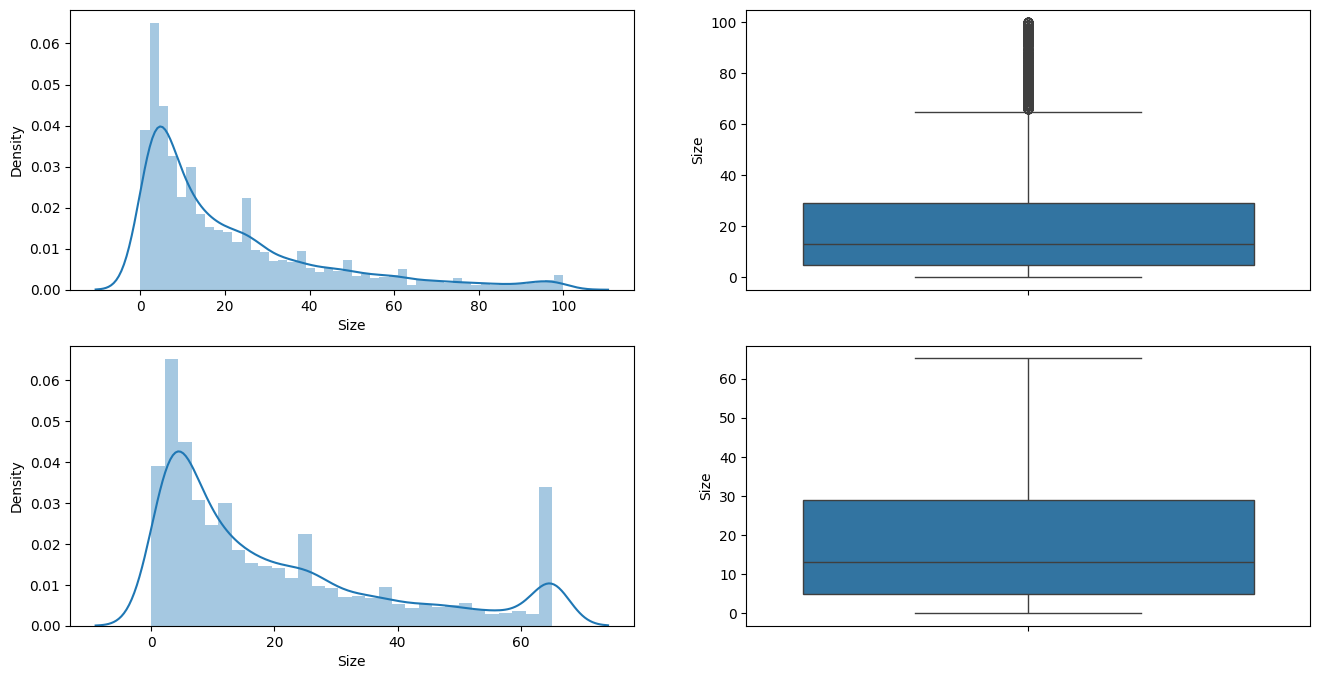

In [31]:
create_comparison_plot(df,df1,"Size")

In [32]:
remove_outliers_IQR('Rating')

percentile25 4.0
percentile75 4.5
Upper limit 5.25
Lower limit 3.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day


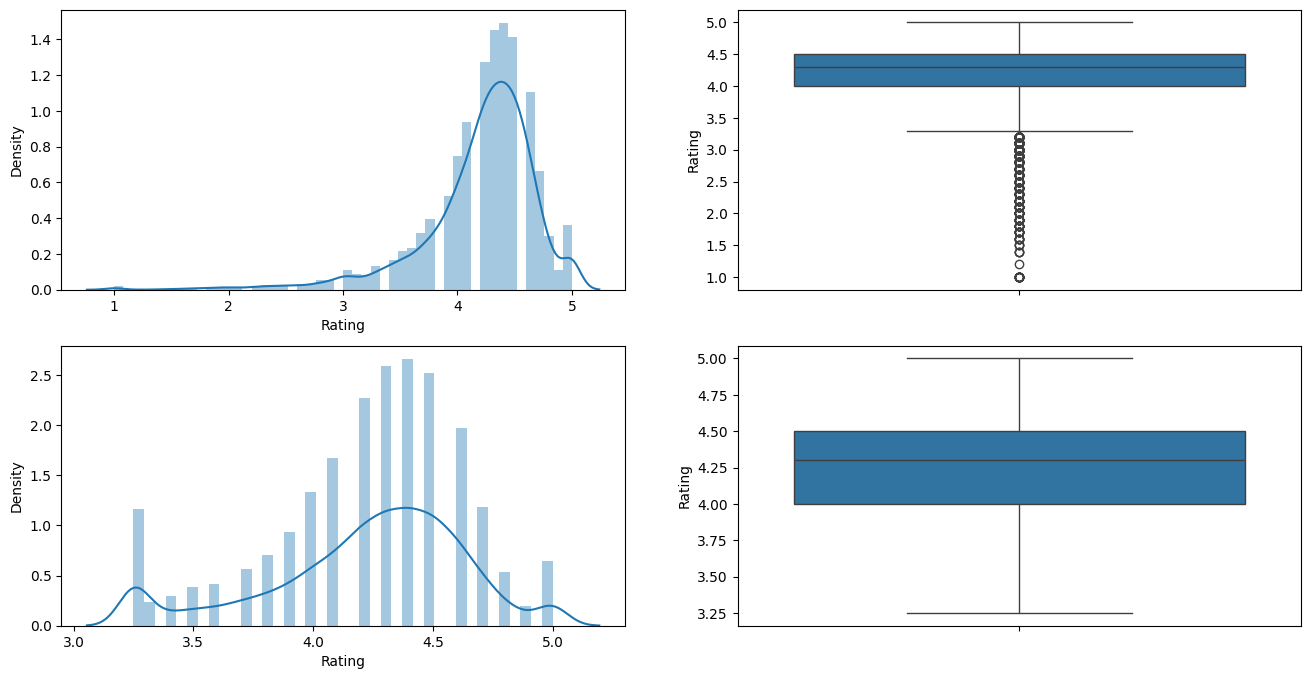

In [33]:
create_comparison_plot(df,df1,"Rating")

In [34]:
remove_outliers_IQR('Reviews')

percentile25 38.0
percentile75 54775.5
Upper limit 136881.75
Lower limit -82068.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day


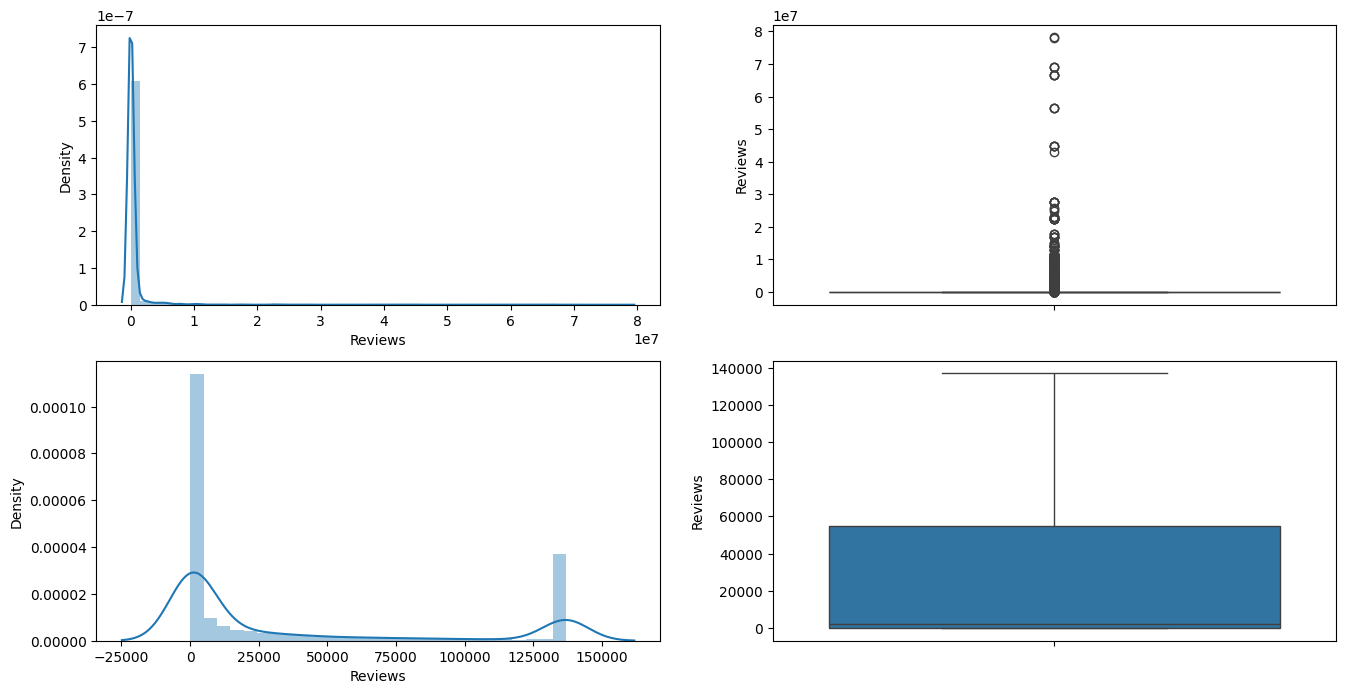

In [35]:
create_comparison_plot(df,df1,"Reviews")

In [36]:
remove_outliers_IQR('Installs')

percentile25 1000.0
percentile75 5000000.0
Upper limit 12498500.0
Lower limit -7497500.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day


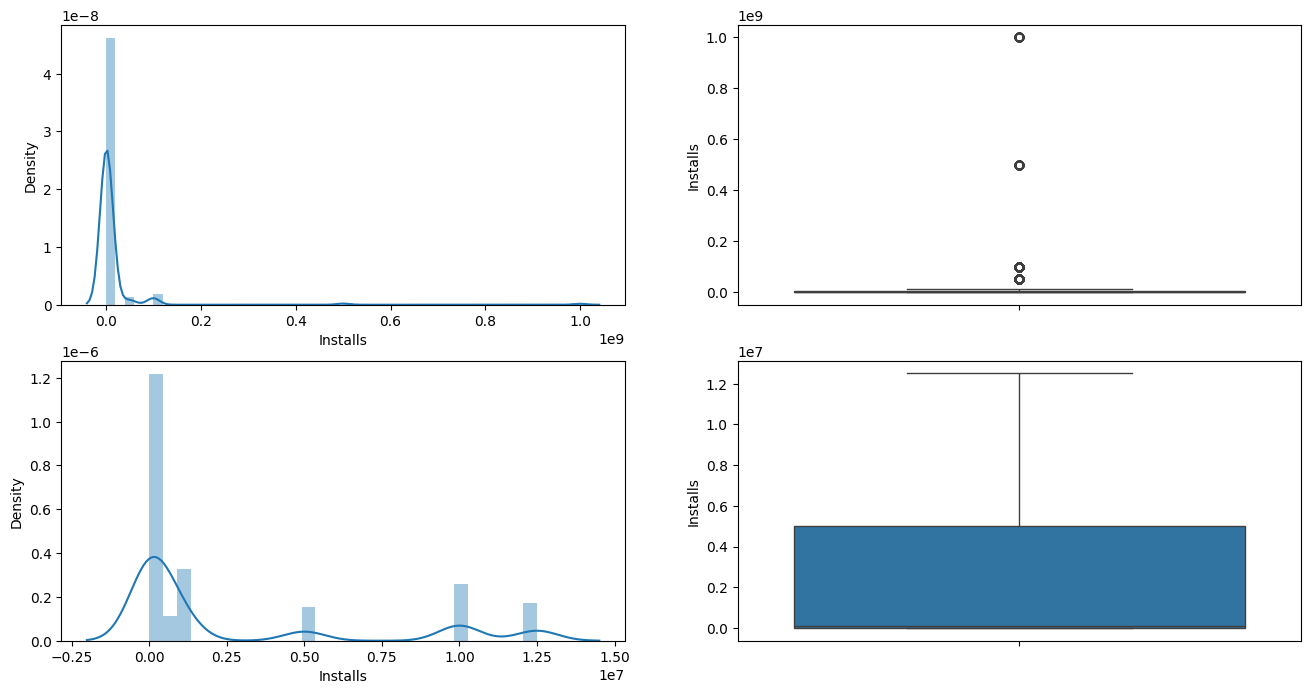

In [37]:
create_comparison_plot(df,df1,"Installs")

In [39]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year', 'month', 'day'],
      dtype='object')

In [40]:
remove_outliers_IQR('year')

percentile25 2017.0
percentile75 2018.0
Upper limit 2019.5
Lower limit 2015.5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day


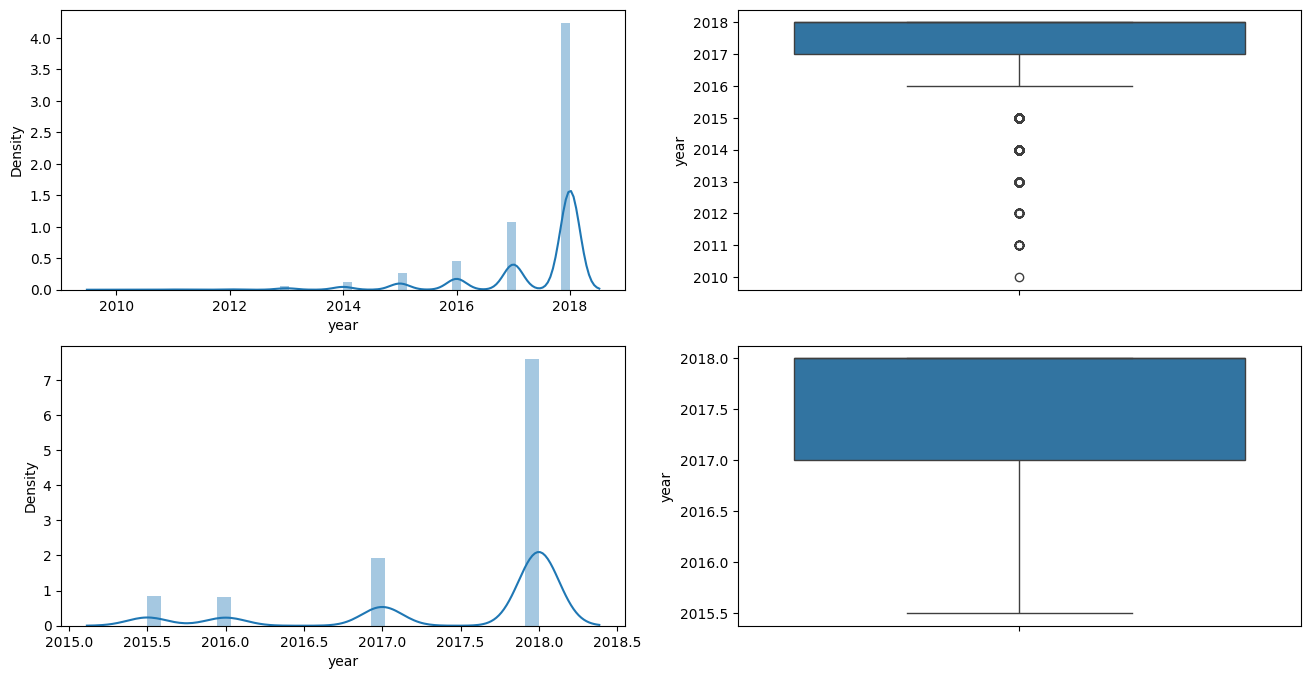

In [42]:
create_comparison_plot(df,df1,"year")

### 4. Compare Skewness

In [44]:
num_df.skew()

Rating     -1.617531
Reviews     2.683356
Size        1.568188
Installs    2.240285
Price       0.000000
year       -2.113335
month      -0.114442
day        -0.002569
dtype: float64

In [45]:
df1[num_df.columns].skew()

Rating      -0.691916
Reviews      1.197882
Size         1.091002
Installs     1.384312
Price       23.707392
year        -1.371946
month       -0.114442
day         -0.002569
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [46]:
df1.to_csv('data/output/google_outliers.csv',index=False)